In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import warnings
import tensorflow as tf 
import keras
import numpy as np 
from sklearn import metrics
import seaborn as sn

warnings.filterwarnings("ignore")

## data loading

In [2]:
# read credit card dataset 
data  = pd.read_csv("credit_card_financial_statement.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
159095,112200.0,2.107525,0.322763,-2.287097,0.916411,1.130367,-0.692650,0.756604,-0.348475,-0.363855,...,0.157979,0.549784,-0.187841,-0.961404,0.654612,-0.375152,-0.043447,-0.087459,1.70,0
239845,150296.0,2.053311,0.089735,-1.681836,0.454212,0.298310,-0.953526,0.152003,-0.207071,0.587335,...,-0.361158,-0.984262,0.354198,0.620709,-0.297138,0.166736,-0.068299,-0.029585,8.99,0
127783,78467.0,-0.425472,1.027500,0.751504,0.078135,-0.345612,-0.813227,0.407425,0.330657,-0.953578,...,0.228351,0.489773,0.027465,0.577226,-0.274286,0.258506,-0.120811,-0.036401,30.00,0
61530,49879.0,0.965003,-0.510049,0.730874,0.486256,0.112234,2.231189,-0.890784,0.691041,0.907405,...,0.005111,0.279294,0.009659,-1.754729,0.047367,0.491429,0.081106,0.012782,54.95,0
103731,68777.0,1.008482,-0.225585,1.325807,1.661581,-0.758653,0.803475,-0.620417,0.413939,0.974093,...,-0.345751,-0.570509,0.090186,0.219824,0.366174,-0.540035,0.086628,0.021808,17.79,0


## Eploratory Data Analysis (EDA)

In [4]:
rows, col = data.shape
print("Rows Count : {}\nColumn Count : {}".format(rows, col))

Rows Count : 284807
Column Count : 31


In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
duplicate = data.duplicated().sum()
print("Numbers of Duplicate: {}".format(duplicate))

Numbers of Duplicate: 1081


In [9]:
print('Duplicate Samples.....')
print("===========================")
data[data.duplicated]

Duplicate Samples.....


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [6]:
data.Class.(

array([0, 1], dtype=int64)

## Visual Exploration 

class(0) : 284315   Class(1) : 492


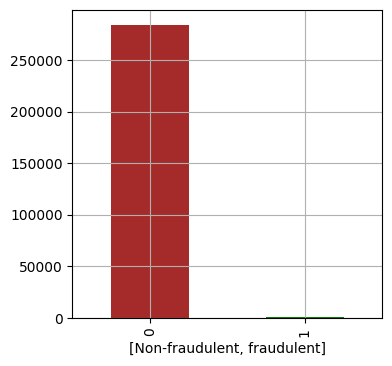

In [10]:
val_one , val_two = data.Class.value_counts()
print("class(0) : {}   Class(1) : {}".format(val_one, val_two))
plt.figure(figsize=(4, 4))
data.Class.value_counts().plot(kind='bar', color=['brown', 'green'], xlabel=["Non-fraudulent" , 'fraudulent'])
plt.grid()

## Data Cleaning 

In [11]:
# removing dublicate 
clean_data = data.drop_duplicates()
clean_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
row , col = clean_data.shape
print("Row Count:{}\nCol Count:{}".format(row, col))

Row Count:283726
Col Count:31


## data Normalization 

In [13]:
scal_att = data[["Time", "Amount"]]
scal_att

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [14]:
# Normalize highly distributed Data..... (Time and Amount)
min_max = MinMaxScaler()
min_max

MinMaxScaler()

In [15]:
time = min_max.fit_transform(clean_data[['Time']])
amt = min_max.fit_transform(clean_data[['Amount']])
clean_data.Time  = time 
clean_data.Amount = amt
clean_data[["Time", "Amount"]]

,Time,Amount
0,0.000000,0.005824
1,0.000000,0.000105
2,0.000006,0.014739
3,0.000006,0.004807
4,0.000012,0.002724
...,...,...
284802,0.999965,0.000030
284803,0.999971,0.000965
284804,0.999977,0.002642
284805,0.999977,0.000389


## Data Splitting

In [16]:
y = clean_data.Class 
X = clean_data.drop(columns=['Class'])
y[:3]

0    0
1    0
2    0
Name: Class, dtype: int64

In [17]:
X.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
89194,0.361521,1.257126,0.344870,0.303501,0.694626,-0.385154,-1.077230,0.075644,-0.194959,0.055911,...,-0.091662,-0.289668,-0.842265,0.131665,0.341118,0.211031,0.094973,-0.023988,0.030407,0.000050
124116,0.446682,1.160957,1.265621,-1.576473,1.472988,1.162173,-1.013532,0.658133,-0.152624,-0.847326,...,0.002466,-0.120365,-0.204997,-0.203189,-0.282172,0.785278,-0.284958,0.058399,0.085436,0.000070
190168,0.744936,-0.034544,0.173167,-0.663999,-1.358076,0.372663,-0.401276,-0.146370,0.220085,-1.616948,...,0.213351,0.544619,1.367109,-0.251459,0.115345,-0.035715,0.182642,-0.037563,-0.046549,0.000467


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=.8)
print('TRAINING AND TESTING DATA')
print("X train :{}   \nX test :{}   \ny train :{}   \ny test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

TRAINING AND TESTING DATA
X train :(226980, 30)   
X test :(56746, 30)   
y train :(226980,)   
y test:(56746,)


## Data Oversampling

0    283253
1    283234
Name: Class, dtype: int64


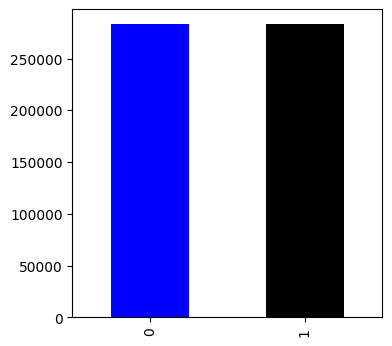

In [19]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_res, y_res = adasyn.fit_resample(X, y)
print(y_res.value_counts())
print("===============================")
plt.figure(figsize=(4,4))
y_res.value_counts().plot(kind='bar', color=['b', 'black'])
# plt.xticks(['Non-frudulent', 'frudulent'])
plt.show()

## Machine learning Training

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Random Forest

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
rf_predict = rf_model.predict(X_test)
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print("Training Score :{}\nTesting Score :{}".format(rf_train_score , rf_test_score))

Training Score :0.9999955943254912
Testing Score :0.9995770627004547


In [23]:
rf_predict = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_predict)
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56652
           1       0.95      0.79      0.86        94

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



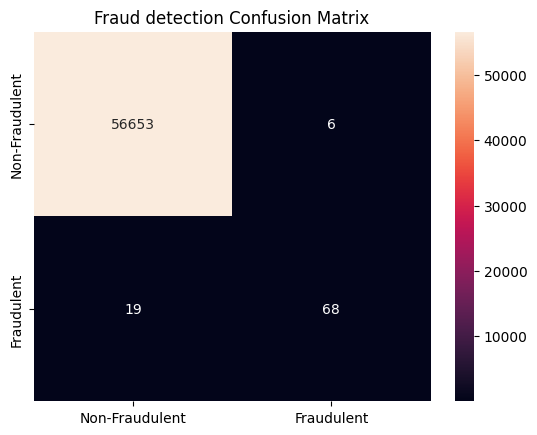

In [59]:
rf_conf_matrix = metrics.confusion_matrix(y_test, rf_predict)
sn.heatmap(rf_conf_matrix,fmt="d", annot=True , xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Fraud detection Confusion Matrix")
plt.show()

## ANN model

In [60]:
ann_model = tf.keras.Sequential([
    tf.keras.Input(shape=(30,)), 
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(
    optimizer='adam', 
    metrics=['accuracy'], 
    loss = "binary_crossentropy"
)
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                744       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                375       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,135
Trainable params: 1,135
Non-trainable params: 0
_________________________________________________________________


In [85]:
train_hist = ann_model.fit(X_train, y_train, epochs=6)

Epoch 1/6
7094/7094 [==============================] - 37s 5ms/step - loss: 0.0056 - accuracy: 0.9983
Epoch 2/6
7094/7094 [==============================] - 32s 4ms/step - loss: 0.0053 - accuracy: 0.9983
Epoch 3/6
7094/7094 [==============================] - 31s 4ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 4/6
7094/7094 [==============================] - 31s 4ms/step - loss: 0.0053 - accuracy: 0.9983
Epoch 5/6
7094/7094 [==============================] - 32s 5ms/step - loss: 0.0053 - accuracy: 0.9983
Epoch 6/6
7094/7094 [==============================] - 33s 5ms/step - loss: 0.0051 - accuracy: 0.9983


In [89]:
ann_predict = ann_model.predict(X_test)
ann_predict =  [1 if pre > 0.5 else 0 for pre in ann_predict]

1774/1774 [==============================] - 7s 4ms/step


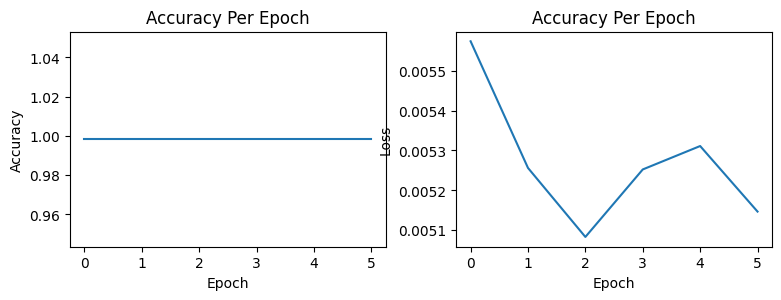

None
            
            Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.00      0.00      0.00        87

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



In [91]:
acc = train_hist.history['accuracy']
loss = train_hist.history['loss']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plt.tight_layout(pad=2)
ax[0].plot(acc)
ax[0].set_title("Accuracy Per Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")

ax[1].plot(loss)
ax[1].set_title("Accuracy Per Epoch")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")

print(plt.show())

class_report = metrics.classification_report(y_test, ann_predict)
print("            \n            Classification Report")
print("     =============================================")
print(class_report)

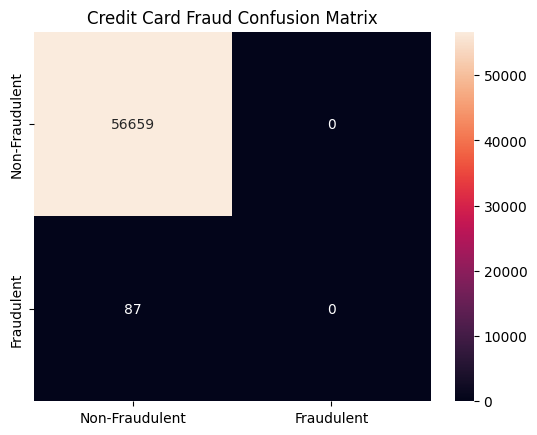

In [88]:
ann_matrix = metrics.confusion_matrix(y_test, ann_predict)
sn.heatmap(ann_matrix,fmt="d", annot=True , xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Credit Card Fraud Confusion Matrix")
plt.show()

## Ensemble Model 

In [24]:
from sklearn.ensemble import BaggingClassifier

ensemble_model = BaggingClassifier()
ensemble_model.fit(X_train, y_train)
ensemble_predict = ensemble_model.predict(X_test)

In [37]:
ensemble_predict = ensemble_model.predict(X_test)
ensemble_train_score = ensemble_model.score(X_train, y_train)
ensemble_test_score = ensemble_model.score(X_test, y_test)

print("Training Score :{}\nTesting Score :{}".format(ensemble_train_score , ensemble_test_score))

Training Score :0.9998722354392457
Testing Score :0.9996299298628978


In [84]:
# report
class_report = metrics.classification_report(y_test, ensemble_predict)
print("            \n            Classification Report")
print("     =============================================")
print(class_report)

            
            Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.92      0.75      0.82        87

    accuracy                           1.00     56746
   macro avg       0.96      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



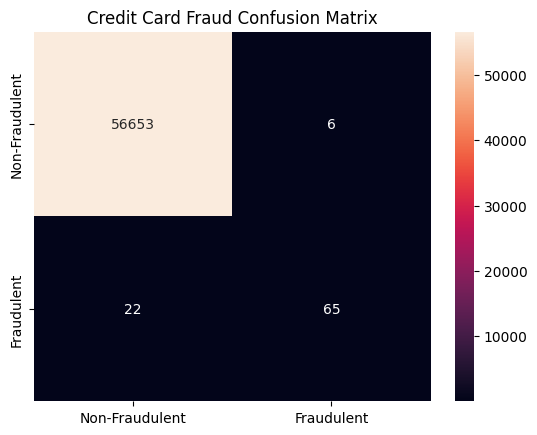

In [92]:
ann_matrix = metrics.confusion_matrix(y_test, ensemble_predict)
sn.heatmap(ann_matrix,fmt="d", annot=True , xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Credit Card Fraud Confusion Matrix")
plt.show()